In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

In [2]:
def gamma_correction(image, gamma):
    n_image = image / 255.0
    c_image = np.power(n_image, gamma)
    c_image = np.uint8(c_image * 255)
    return c_image

In [3]:
def compare_images(original, corrected):
    mse_val = calculate_mse(original, corrected)
    ssim_val = ssim(original, corrected, multichannel=False)
    return mse_val, ssim_val


In [4]:
def calculate_mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [5]:
def statistical_color_correction(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    eq_gray = cv2.equalizeHist(gray_image)
       
    b, g, r = cv2.split(image)
    b_eq = cv2.equalizeHist(b)
    g_eq = cv2.equalizeHist(g)
    r_eq = cv2.equalizeHist(r)
    
    corrected_image = cv2.merge((b_eq, g_eq, r_eq))
    return corrected_image

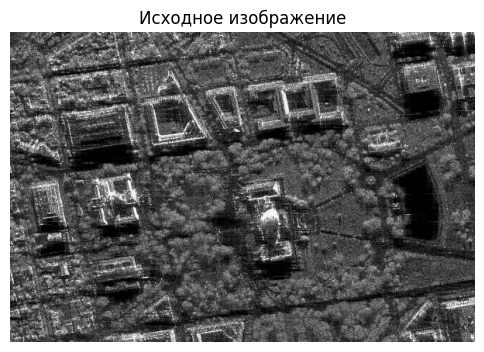

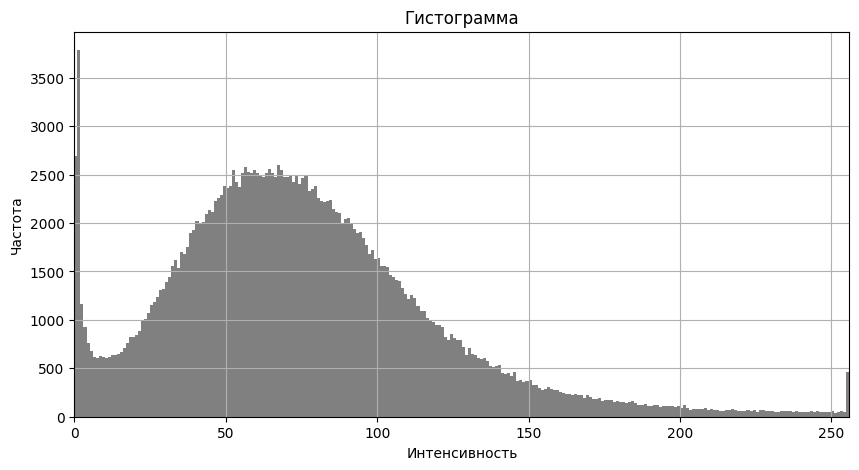

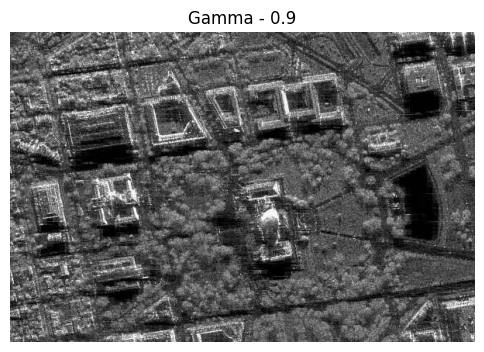

Gamma - 0.9 | MSE - 65.61, SSIM - 0.9912


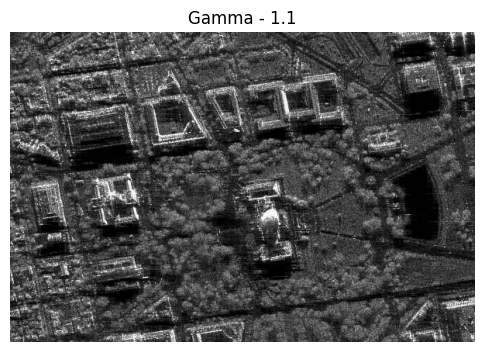

Gamma - 1.1 | MSE - 64.54, SSIM - 0.9869


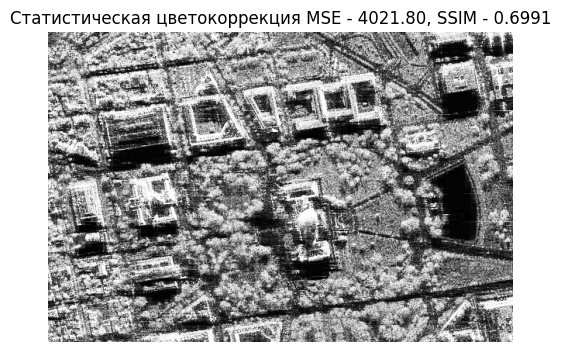

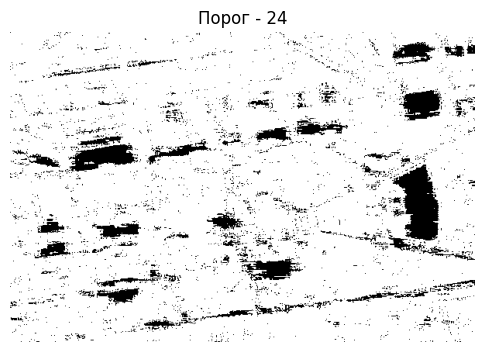

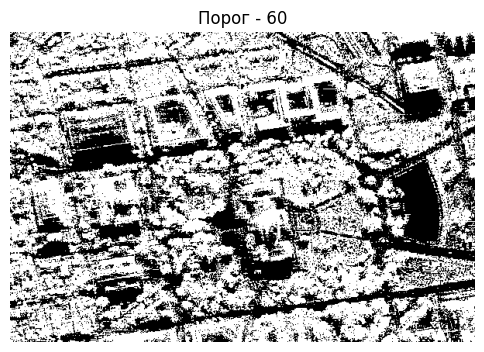

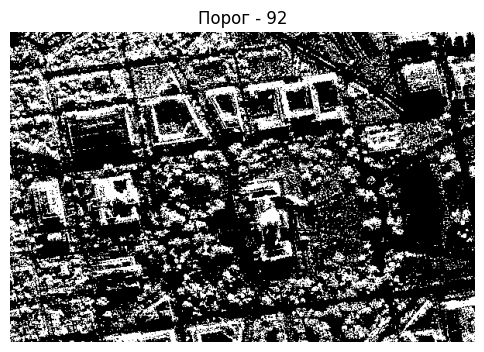

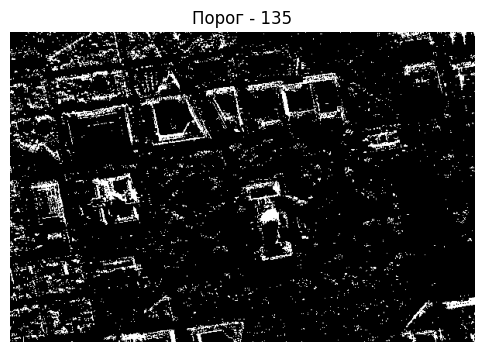

In [6]:
def threshold_filtering(image, threshold):
    _, thr_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thr_image

image_path = 'sar_1_gray.jpg'  
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Гистограмма')
plt.xlabel('Интенсивность')
plt.ylabel('Частота')
plt.xlim([0, 256])
plt.grid()
plt.show()

gamma_values = [0.9, 1.1]  

for gamma in gamma_values:
    corrected_image = gamma_correction(gray_image, gamma)
    
    
    plt.figure(figsize=(6, 6))
    plt.imshow(corrected_image, cmap='gray')
    plt.title(f'Gamma - {gamma}')
    plt.axis('off')
    plt.show()
    
    
    mse_value, ssim_value = compare_images(gray_image, corrected_image)
    print(f'Gamma - {gamma} | MSE - {mse_value:.2f}, SSIM - {ssim_value:.4f}')

statistical_corrected_image = statistical_color_correction(image)

mse_statistical, ssim_statistical = compare_images(gray_image, cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2GRAY))

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2RGB))
plt.title(f'Статистическая цветокоррекция MSE - {mse_statistical:.2f}, SSIM - {ssim_statistical:.4f}')
plt.axis('off')
plt.show()

thresholds = [24, 60, 92, 135]

for threshold in thresholds:
    thresholded_image = threshold_filtering(gray_image, threshold)  
    plt.figure(figsize=(6, 6))
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Порог - {threshold}')
    plt.axis('off')
    plt.show()
